In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import numpy as np

import scipy.optimize as opt


import sys
sys.path.insert(0,'/home/hungjinh/python_lib/CAMB/pycamb')
import camb
from camb import model, initialpower

%pylab inline
%run cal_Pk_tool.py

Populating the interactive namespace from numpy and matplotlib


In [2]:
basePath = '/home/hungjinh/Research/baryon_proj/catalog/illustris_cat/Illustris-3-Dark/'
snap=135
boxsize=75.  # comoving Mpc/h
resol = 128
Vbox=boxsize**3

In [3]:
%run cal_Pk_tool.py
den=build_den_cube_DMO(snap=snap,basePath=basePath,boxsize=boxsize,resol=resol)

In [4]:
Amp_FFTden=cal_Amp_FFTden(den=den,resol=resol)

In [5]:
k=cal_freq_FFT(boxsize,resol)

kmax: 9.28665274488
kmin: 0.0


In [6]:
kbins=np.logspace(-1,1,23)
avgk,avgPk=cal_Pk(kbins=kbins,Amp_FFTden=Amp_FFTden,k=k,Vbox=Vbox)

In [7]:
kh_camb,pk_camb=gen_camb_Pk_illustris_cosmology(redshifts=[0])

(0.03, 35)

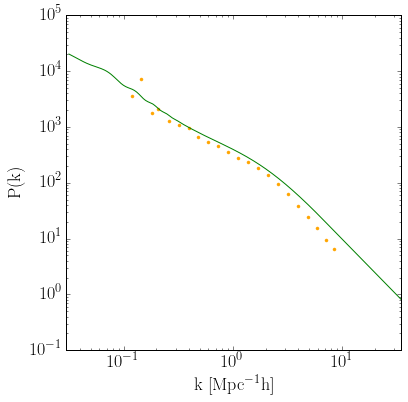

In [8]:
plt.figure(figsize=(6,6))
plt.rc('text', usetex=True)      
plt.rc('font',size=18) 

plt.plot(avgk,avgPk,'.',c='orange')
plt.plot(kh_camb,pk_camb[0],c='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
plt.ylabel(r'$\mathrm{P(k)}$')

plt.xlim(0.03,35)

In [9]:
avgk

array([ 0.11847688,  0.14510395,  0.18337304,  0.20520797,  0.26010971,
        0.32244599,  0.39568276,  0.48399876,  0.59596783,  0.7381514 ,
        0.91171343,  1.12360787,  1.38756848,  1.71066786,  2.10658639,
        2.59672475,  3.20213546,  3.94860637,  4.86732175,  5.91680382,
        7.12591493,  8.39700823])

In [10]:
avgPk

array([  3.63377877e+03,   7.27067978e+03,   1.76571074e+03,
         2.06120058e+03,   1.29953749e+03,   1.06450689e+03,
         9.75391965e+02,   6.61546396e+02,   5.45543037e+02,
         4.52356183e+02,   3.60755314e+02,   2.79309302e+02,
         2.31456394e+02,   1.81552647e+02,   1.36594715e+02,
         9.53692529e+01,   6.18206736e+01,   3.84164248e+01,
         2.39473184e+01,   1.51767009e+01,   9.36192092e+00,
         6.38104978e+00])